In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from scipy.signal import savgol_filter
import plotly.express as px
import plotly.graph_objects as go
from icecream import ic
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage

import scipy.cluster.hierarchy as spc

In [2]:
data = pd.read_excel("../data/Dataset_HPLC.xlsx", sheet_name="Mua(102)")
data.head(5)

,No.,Name,Group,%CM,%CA,%CAL,600,602,604,606,...,3982,3984,3986,3988,3990,3992,3994,3996,3998,4000
0,1,22.1.8.Qna-01,2,0.271000,0.147,6.695,0.237,0.237,0.235,0.233,...,0.032,0.031,0.031,0.032,0.033,0.032,0.032,0.031,0.030,0.030
1,2,22.1.8.Qna-03,2,0.251000,0.068,3.593,0.178,0.176,0.173,0.171,...,0.034,0.033,0.033,0.034,0.035,0.034,0.034,0.034,0.033,0.033
2,3,22.1.8.Qna-05,2,0.453000,0.068,3.575,0.182,0.183,0.180,0.177,...,0.033,0.032,0.033,0.034,0.035,0.034,0.034,0.033,0.032,0.032
3,4,22.1.8.Qna-07,2,0.730000,0.100,6.050,0.273,0.270,0.267,0.264,...,0.004,0.003,0.003,0.004,0.005,0.004,0.004,0.002,0.002,0.002
4,5,22.1.8.Qna-08,2,0.200507,0.098,4.202,0.228,0.226,0.224,0.222,...,0.032,0.031,0.031,0.032,0.033,0.033,0.032,0.031,0.031,0.030


In [3]:
y = data["Group"]
X = data.iloc[:, 6:]
X.columns = X.columns.astype(str)
cols = X.columns

### Cluster analysis on raw data

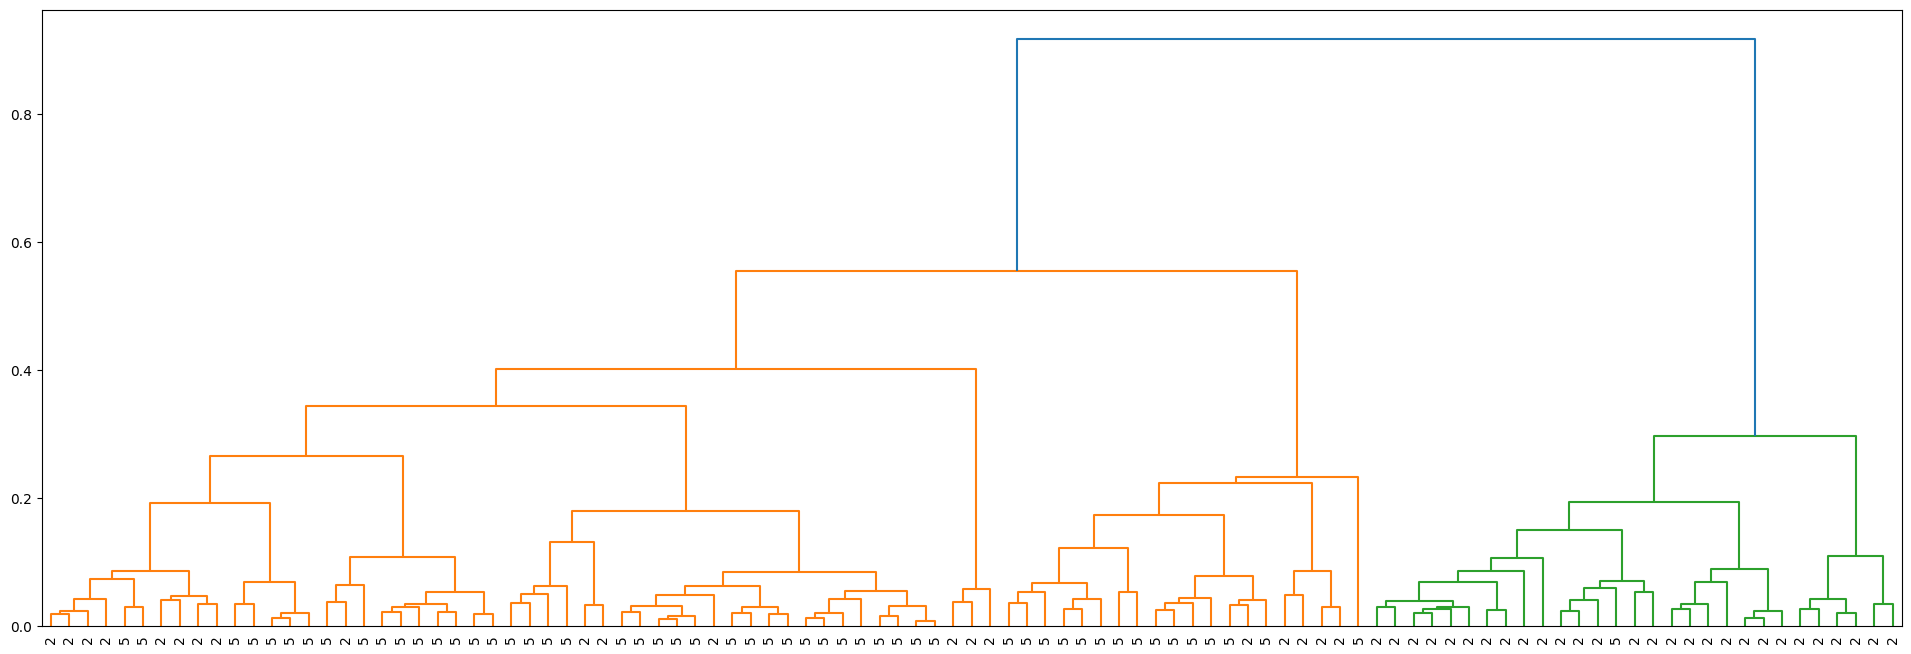

In [4]:
df = pd.DataFrame(X.T)
corr = df.corr('pearson').values
plt.figure(figsize=(24, 8))
pdist = spc.distance.pdist(corr)
linkage = spc.linkage(pdist, method='ward', metric='cosine')
den = dendrogram(linkage,
            orientation='top',
            labels=y.values,
            distance_sort='descending',
            show_leaf_counts=True,
            leaf_font_size=10)

### PCA on raw data

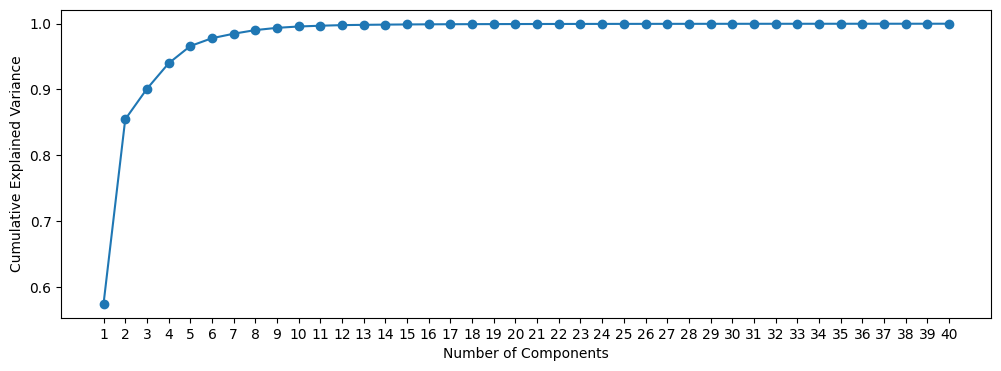

In [5]:
pca = PCA(40)
pca.fit(X)
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)
plt.figure(figsize=(12,4))
plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xticks(np.arange(1, len(cumulative_explained_variance) + 1))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [6]:
season = {
    2: 'Thang 8',
    5: 'Thang 3',
}
color = {
    2: 'red',
    5: 'blue'
}

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

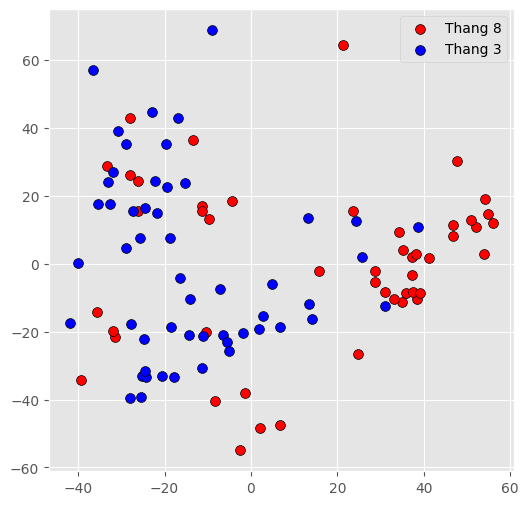

In [8]:
reducer = PCA(2)
embedding = reducer.fit_transform(X_scaled)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(6, 6))
    for key, value in season.items():
        ax.scatter(embedding[:, 0][y==key], embedding[:, 1][y==key], c=color[key], label=value, edgecolors='k', s = 50)
    ax.legend()
    plt.show()

### Đạo hàm bậc 1

In [9]:
X_deriv1 = savgol_filter(X, window_length=25, polyorder=5, deriv=1)

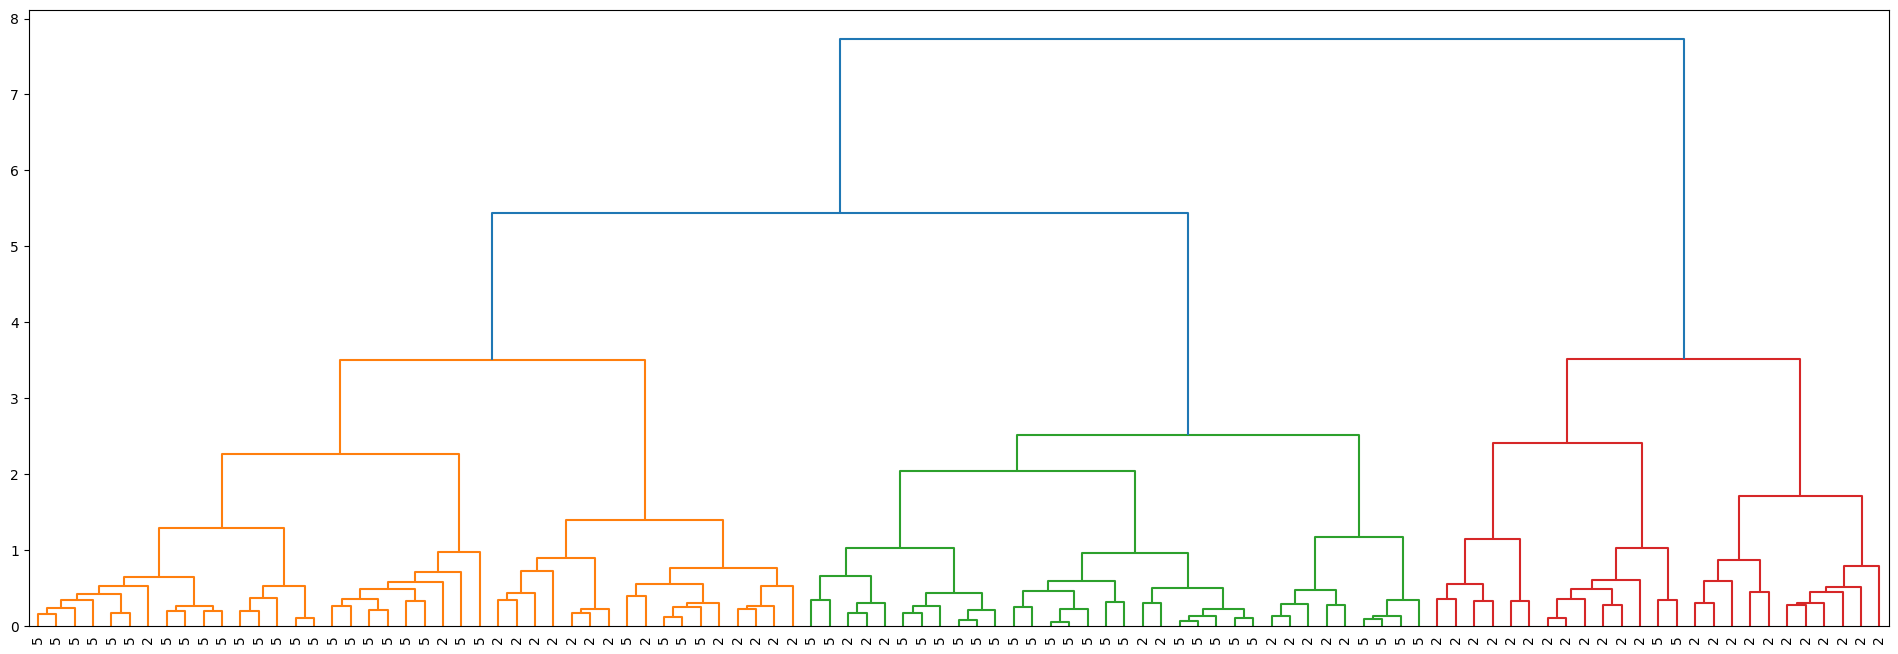

In [10]:
df = pd.DataFrame(X_deriv1.T)
corr = df.corr('pearson').values
plt.figure(figsize=(24, 8))
pdist = spc.distance.pdist(corr)
linkage = spc.linkage(pdist, method='ward', metric='cosine')
den = dendrogram(linkage,
            orientation='top',
            labels=y.values,
            distance_sort='descending',
            show_leaf_counts=True,
            leaf_font_size=10)

In [11]:
scaler = StandardScaler()
X_deriv1 = scaler.fit_transform(X_deriv1)

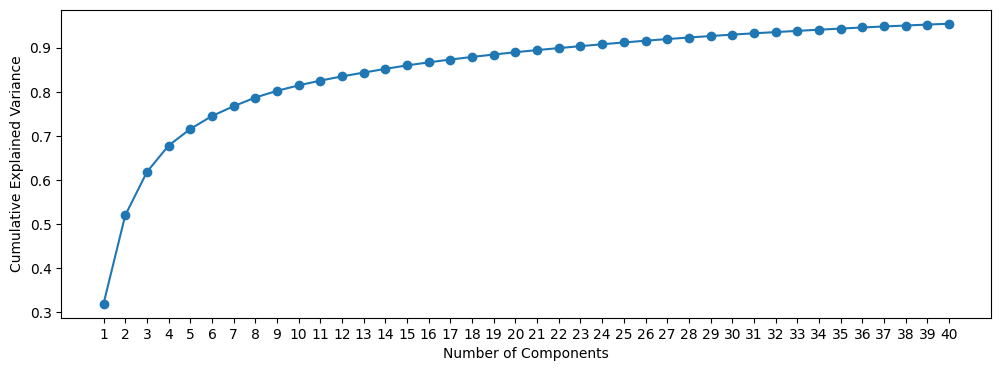

In [12]:
pca = PCA(40)
pca.fit(X_deriv1)
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)
plt.figure(figsize=(12,4))
plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xticks(np.arange(1, len(cumulative_explained_variance) + 1))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

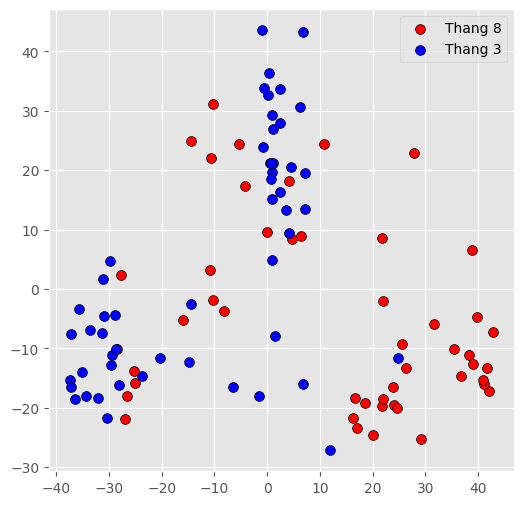

In [13]:
reducer = PCA(2)
embedding = reducer.fit_transform(X_deriv1)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(6, 6))
    for key, value in season.items():
        ax.scatter(embedding[:, 0][y==key], embedding[:, 1][y==key], c=color[key], label=value, edgecolors='k', s = 50)
    ax.legend()
    plt.show()

### Đạo hàm bậc 2

In [14]:
X_deriv2 = savgol_filter(X, window_length=25, polyorder=5, deriv=1)

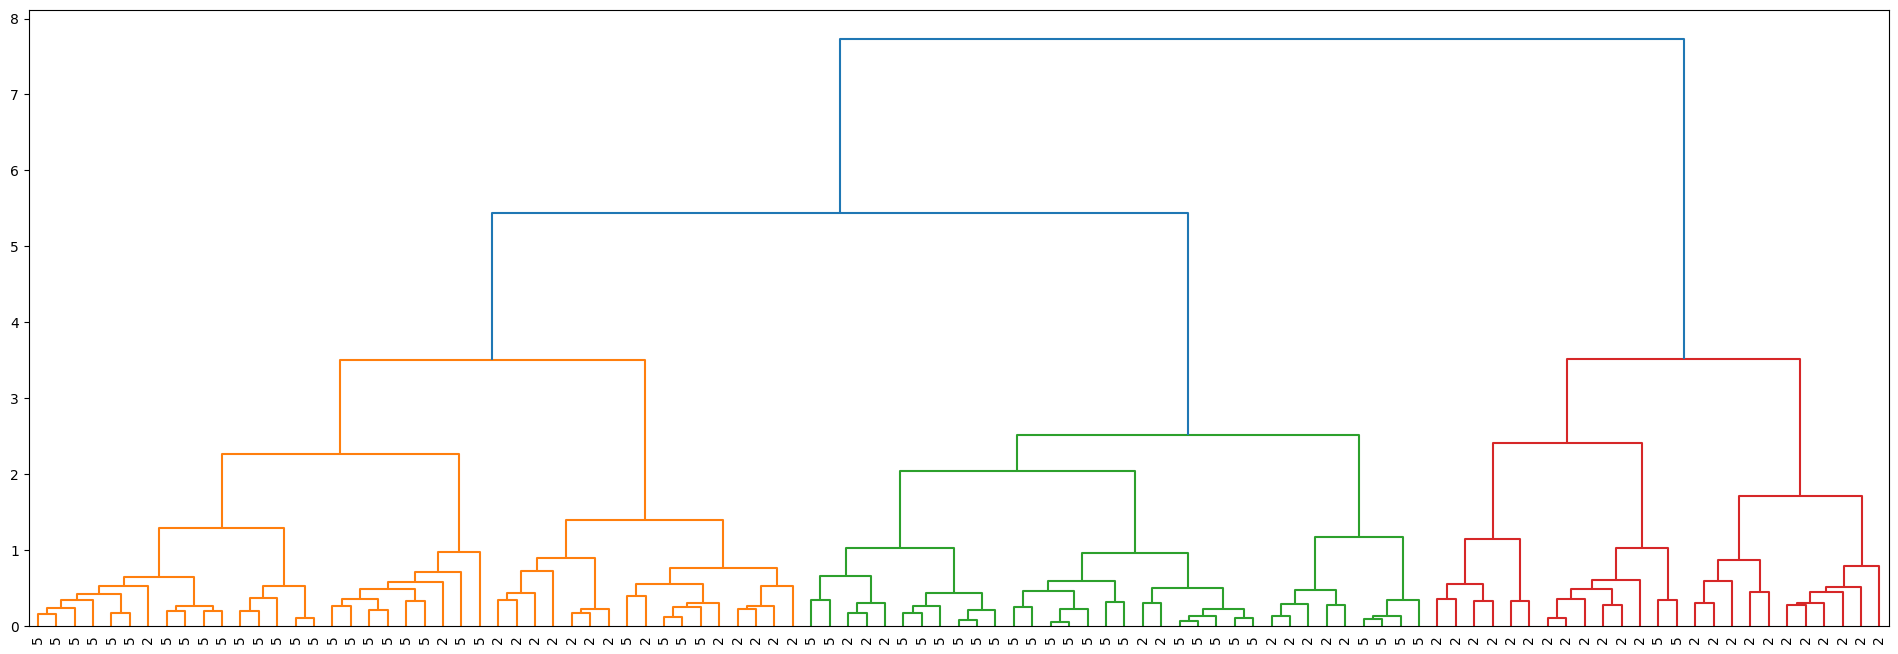

In [15]:
df = pd.DataFrame(X_deriv2.T)
corr = df.corr('pearson').values
plt.figure(figsize=(24, 8))
pdist = spc.distance.pdist(corr)
linkage = spc.linkage(pdist, method='ward', metric='cosine')
den = dendrogram(linkage,
            orientation='top',
            labels=y.values,
            distance_sort='descending',
            show_leaf_counts=True,
            leaf_font_size=10)

In [16]:
scaler = StandardScaler()
X_deriv2 = scaler.fit_transform(X_deriv2)

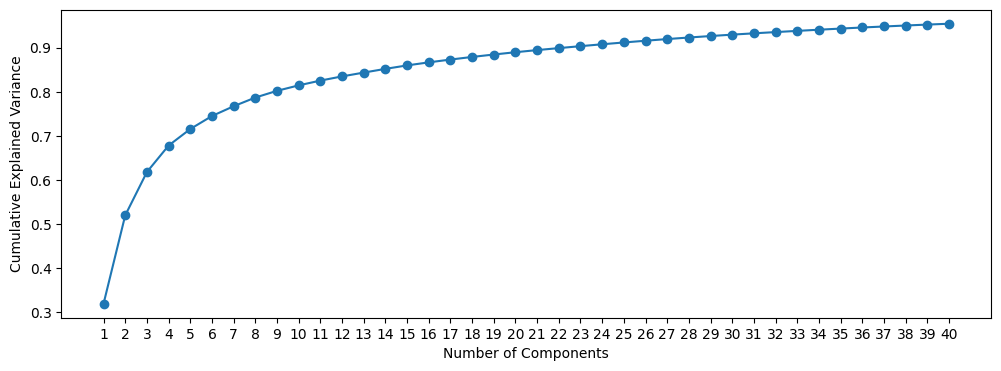

In [17]:
pca = PCA(40)
pca.fit(X_deriv2)
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)
plt.figure(figsize=(12,4))
plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xticks(np.arange(1, len(cumulative_explained_variance) + 1))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

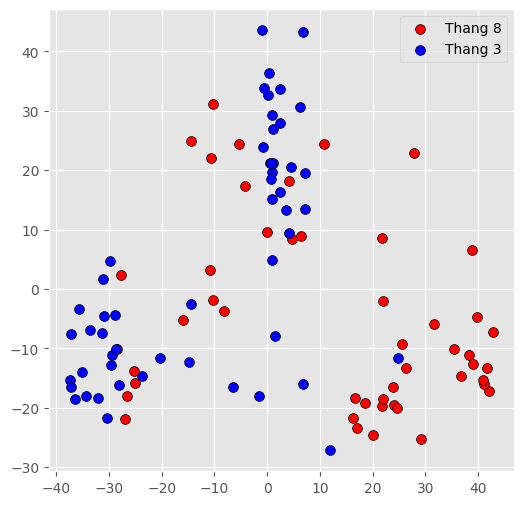

In [18]:
reducer = PCA(2)
embedding = reducer.fit_transform(X_deriv2)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(6, 6))
    for key, value in season.items():
        ax.scatter(embedding[:, 0][y==key], embedding[:, 1][y==key], c=color[key], label=value, edgecolors='k', s = 50)
    ax.legend()
    plt.show()